In [1]:
%matplotlib inline
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from searchnets import plot

In [6]:
TEST_RESULTS_DIR = Path('../../data/results')
test_df = pd.read_csv(TEST_RESULTS_DIR.joinpath('all-test-results.csv'))

In [ ]:
figsize=(15, 7.5)

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for row, net in enumerate(('alexnet', 'VGG16')):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial configuration'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
            if row == 1 and col == 0:
                add_legend=True
            else:
                add_legend=False
            plot.figures.acc_v_set_size_df(test_df, net, 'finetune', stim_abbrev, ylim=(0.4, 1.05), ax=ax[row, col], add_legend=add_legend)

In [16]:
def one_net_three_stims(df, net_name, training, figsize=(15, 5), ylim=(0.4, 1.05), add_legend=False, save_as=None):
    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=figsize)
    # add a big axis, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial configuration'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
        if add_legend:
            if col == 0:
                add_legend_this_plot=True
            else:
                add_legend_this_plot=False
        else:
            add_legend_this_plot=False
        plot.figures.acc_v_set_size_df(test_df, net_name, training, stim_abbrev, 
                                       ylim=ylim, ax=ax[col], add_legend=add_legend_this_plot)

    if save_as:
        plt.savefig(save_as)

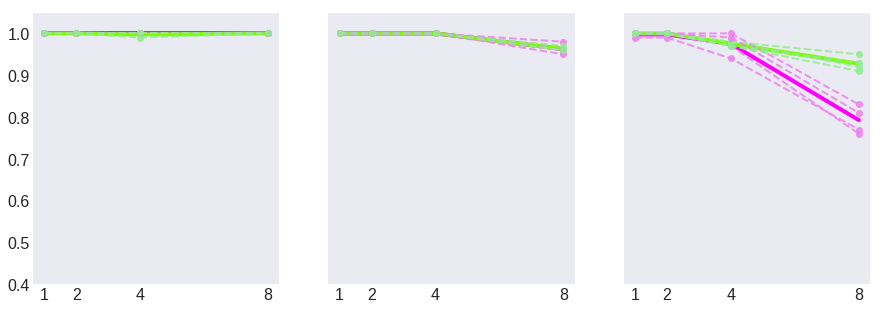

In [19]:
one_net_three_stims(test_df, 'alexnet', 'train', save_as='../static/fig3/alexnet_train.png')

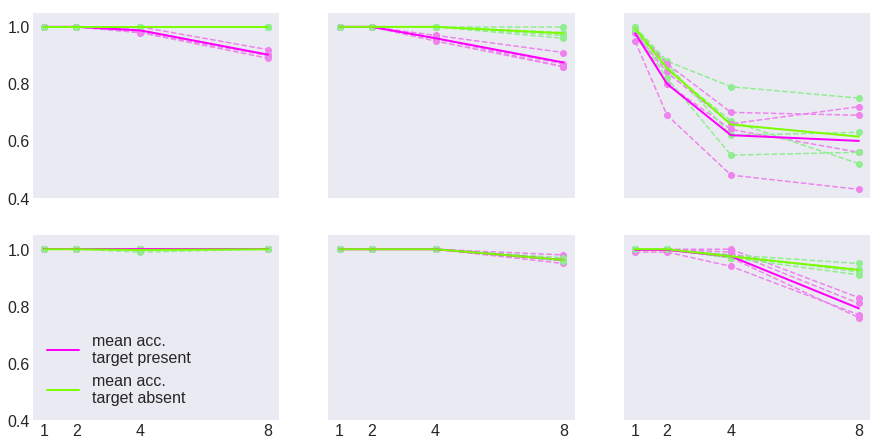

In [4]:
TEST_RESULTS_DIR = '../../data/results'
SET_SIZES = [1, 2, 4, 8]
figsize=(15, 7.5)

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

net = 'alexnet'
for row, training in enumerate(('finetune','train')):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial configuration'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
        if row == 1 and col == 0:
            add_legend=True
        else:
            add_legend=False
        plot.figures.acc_v_set_size_df(test_df, net, training, stim_abbrev, ylim=(0.4, 1.05), ax=ax[row, col], add_legend=add_legend)

plt.savefig('../static/fig3/from-ipynb.png')